In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# 读取所有5个fold的数据并计算RMSE和R^2
rmses = []
r2s = []
for fold in range(1,6):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data).T[[0,6,8,9]].T.astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data).T[[0,6,8,9]].T.astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data).T[[0,6,8,9]].T.astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    def quadratic_function(x, a, b, c, d, e):
        return a * x[:, 0] + b * x[:, 1] + c*x[:,2] + d*x[:, 3] + e

    # 拟合模型
    params, _ = curve_fit(quadratic_function, X_train_1, y_train_1)

    # 预测
    y_train_pred = quadratic_function(X_train, *params)
    y_test_pred = quadratic_function(X_test, *params)

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')


# 使用第3折的数据进行后续分析
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data).T[[0,6,8,9]].T.astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data).T[[0,6,8,9]].T.astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data).T[[0,6,8,9]].T.astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

def quadratic_function(x, a, b, c, d, e):
    return a * x[:, 0] + b * x[:, 1] + c*x[:,2] + d*x[:, 3] + e

params, _ = curve_fit(quadratic_function, X_train_1, y_train_1)
print(params)
y_train_pred = quadratic_function(X_train, *params)
y_test_pred = quadratic_function(X_test, *params)

# 表示能力
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('MLR ALL RMSE:', r_rmse)
print('MLR ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('MLR Generalization RMSE:', g_rmse)
print('MLR Generalization R2:', g_r2)

Fold 1 RMSE: 2.0127, R^2: 0.5084
Fold 2 RMSE: 2.2832, R^2: -0.5333
Fold 3 RMSE: 2.6312, R^2: 0.1952
Fold 4 RMSE: 4.6698, R^2: 0.4519
Fold 5 RMSE: 1.4425, R^2: 0.4257

Mean RMSE: 2.6079
Std RMSE: 1.1018
Mean R^2: 0.2096
Std R^2: 0.3865
[ 26.77544668   6.50537739  11.39718435 -20.07290246  33.8079928 ]
MLR ALL RMSE: 2.3413320634111754
MLR ALL R2: 0.5957160914014897
MLR Generalization RMSE: 2.631199391259615
MLR Generalization R2: 0.19520473146782458


/tmp/ipykernel_4653/3426703152.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


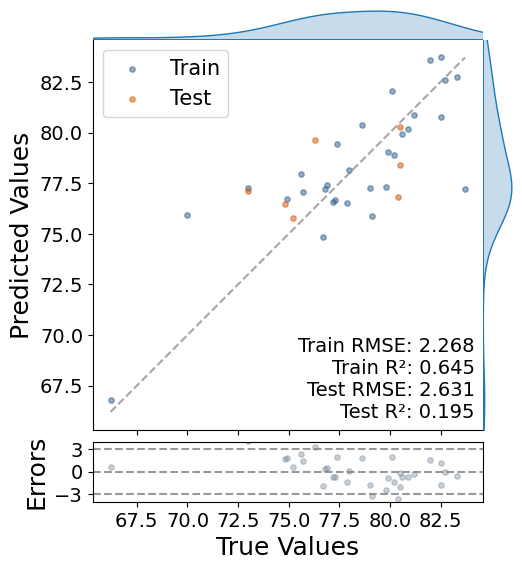

In [14]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/MLR_Hardness.png", dpi=600)

In [15]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
np.random.seed(0)

# 读取所有5个fold的数据并计算RMSE和R^2
rmses = []
r2s = []
for fold in range(1,6):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # 使用XGBoost回归
    xgb = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=0
    )

    # 拟合模型
    xgb.fit(X_train_1, y_train_1)

    # 预测
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')

# 使用第3折的数据进行后续分析
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)
xgb.fit(X_train_1, y_train_1)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 表示能力
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('XGBoost ALL RMSE:', r_rmse)
print('XGBoost ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('XGBoost Generalization RMSE:', g_rmse)
print('XGBoost Generalization R2:', g_r2)


Fold 1 RMSE: 3.9686, R^2: -0.9114
Fold 2 RMSE: 2.9045, R^2: -1.4813
Fold 3 RMSE: 2.5050, R^2: 0.2706
Fold 4 RMSE: 5.7542, R^2: 0.1679
Fold 5 RMSE: 1.4997, R^2: 0.3792

Mean RMSE: 3.3264
Std RMSE: 1.4489
Mean R^2: -0.3150
Std R^2: 0.7448
XGBoost ALL RMSE: 1.193787766353343
XGBoost ALL R2: 0.8948971049934911
XGBoost Generalization RMSE: 2.504962223550058
XGBoost Generalization R2: 0.2705756516197835


/tmp/ipykernel_4653/3104060454.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


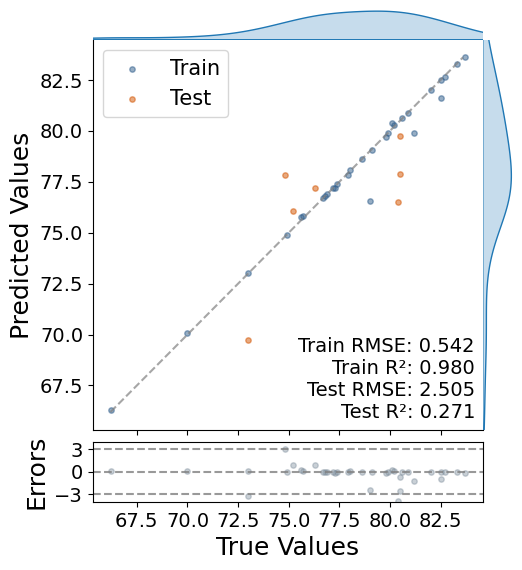

In [16]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/XGBoost_Hardness.png", dpi=600)

In [17]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
np.random.seed(0)

# 读取所有5个fold的数据并计算RMSE和R^2
rmses = []
r2s = []
for fold in range(1,6):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # 使用SVR进行回归
    svr = SVR(kernel='rbf', C=100, gamma='scale')

    # 拟合模型
    svr.fit(X_train_1, y_train_1)

    # 预测
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')


# 使用第3折的数据进行后续分析
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train_1, y_train_1)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# 表示能力
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('SVR ALL RMSE:', r_rmse)
print('SVR ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('SVR Generalization RMSE:', g_rmse)
print('SVR Generalization R2:', g_r2)


Fold 1 RMSE: 2.5870, R^2: 0.1878
Fold 2 RMSE: 1.6342, R^2: 0.2144
Fold 3 RMSE: 2.9036, R^2: 0.0200
Fold 4 RMSE: 5.4498, R^2: 0.2536
Fold 5 RMSE: 1.8774, R^2: 0.0271

Mean RMSE: 2.8904
Std RMSE: 1.3599
Mean R^2: 0.1406
Std R^2: 0.0979
SVR ALL RMSE: 2.9114096797297995
SVR ALL R2: 0.3748747032236459
SVR Generalization RMSE: 2.9035754286601936
SVR Generalization R2: 0.019959282534538936


/tmp/ipykernel_4653/3927898597.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


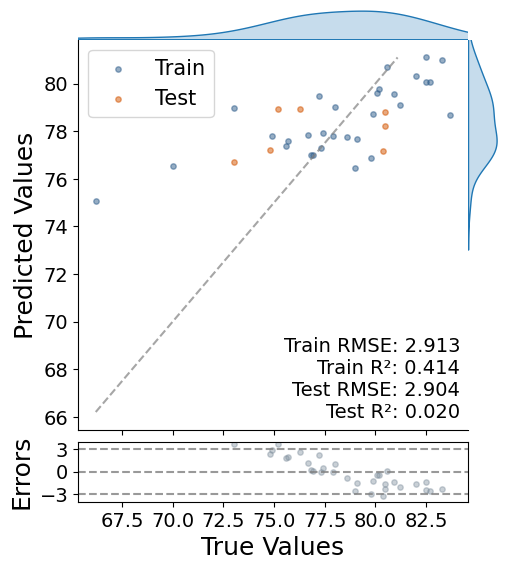

In [18]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/SVR_Hardness.png", dpi=600)

In [19]:
# 使用随机森林进行回归
from sklearn.ensemble import RandomForestRegressor

# 读取所有5个fold的数据并计算RMSE和R^2
rmses = []
r2s = []
for fold in range(1,6):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # 使用随机森林进行回归
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # 拟合模型
    rf.fit(X_train_1, y_train_1)

    # 预测
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')

# 使用第3折的数据进行后续分析
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_1, y_train_1)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 表示能力
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('Random Forest ALL RMSE:', r_rmse)
print('Random Forest ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Random Forest Generalization RMSE:', g_rmse)
print('Random Forest Generalization R2:', g_r2)

Fold 1 RMSE: 2.8380, R^2: 0.0225
Fold 2 RMSE: 2.6472, R^2: -1.0612
Fold 3 RMSE: 2.3193, R^2: 0.3747
Fold 4 RMSE: 5.5901, R^2: 0.2146
Fold 5 RMSE: 1.7949, R^2: 0.1108

Mean RMSE: 3.0379
Std RMSE: 1.3242
Mean R^2: -0.0677
Std R^2: 0.5104
Random Forest ALL RMSE: 1.684507153843928
Random Forest ALL R2: 0.7907303972249831
Random Forest Generalization RMSE: 2.31933663545669
Random Forest Generalization R2: 0.37467546261148743


/tmp/ipykernel_4653/3593360110.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


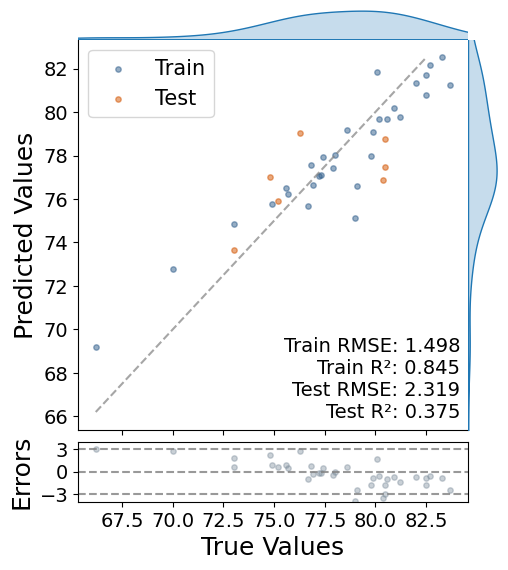

In [20]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/RF_Hardness.png", dpi=600)

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.random.seed(0)

# dso original
print("DSR Simple")
f1 = lambda x : ((23.023414628513166 - 8.824599561479276/x[:,8])*np.exp(np.exp(x[:,6])) - 54.2757443953214)/x[:,6]
f2 = lambda x : -x[:,2] + x[:,8]*(x[:,8]*(-x[:,8]**2 + 5*x[:,8]) + x[:,8])
f3 = lambda x : (27.15353833205803*x[:,8] + 7.1862809159774095/x[:,6])*(np.exp(x[:,6]) - 0.6408953469171315)
f4 = lambda x : -x[:,2] + x[:,7] + (-x[:,7] - 224.2106086055777)/(x[:,8]*np.exp(-0.7190007425403613*x[:,5] + 0.7190007425403613*x[:,6] - x[:,7]) + x[:,9]) + 135.30784564127543
f5 = lambda x : (x[:,10] + x[:,8])*(2*x[:,10] + 10*x[:,8])/x[:,10]

# dso simple
# f0 = lambda x : (27.15353833205803*x[:,8] + 7.1862809159774095/x[:,6])*(np.exp(x[:,6]) - 0.6408953469171315)
f_list = [f1,f2,f3,f4,f5]


rmses = []
r2s = []
for fold in range(5):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold+1}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold+1}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold+1}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1


    y_train_pred = f_list[fold](X_train)
    y_test_pred = f_list[fold](X_test)		

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')



# 表示能力
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

y_train_pred = f_list[2](X_train)
y_test_pred = f_list[2](X_test)

y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('ALL RMSE:', r_rmse)
print('ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Generalization RMSE:', g_rmse)
print('Generalization R2:', g_r2)

DSR Simple
Fold 0 RMSE: 2.0304, R^2: 0.4997
Fold 1 RMSE: 1.8509, R^2: -0.0077
Fold 2 RMSE: 1.2245, R^2: 0.8257
Fold 3 RMSE: 4.2630, R^2: 0.5433
Fold 4 RMSE: 1.8969, R^2: 0.0067

Mean RMSE: 2.2532
Std RMSE: 1.0427
Mean R^2: 0.3735
Std R^2: 0.3253
ALL RMSE: 2.10288404438773
ALL R2: 0.6738697509010858
Generalization RMSE: 1.2244635964690982
Generalization R2: 0.8257111314888411


/tmp/ipykernel_4653/4107341290.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


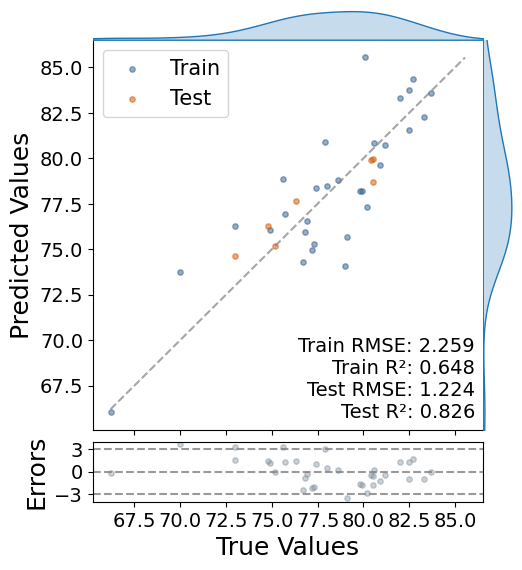

In [22]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/DSR_Hardness.png", dpi=600)

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.random.seed(0)

# dso original
print("uDSR Simple")
f1 = lambda x : x[:,6] + 17*x[:,8] + 15.1542622414793
f2 = lambda x : x[:,8]**2*(-x[:,8]**2 + 5*x[:,8] + 1.0)
f3 = lambda x : x[:,8]*np.exp(x[:,5] + 3) + x[:,8]
f4 = lambda x : 15.1542622414793*x[:,6] + 15.1542622414793*x[:,8] + 15.1542622414793*np.exp(x[:,6])
f5 = lambda x : (x[:,3] + 6*x[:,8])*np.exp((x[:,8] + 1.0)/x[:,8])
# dso simple
# f0 = lambda x : (27.15353833205803*x[:,8] + 7.1862809159774095/x[:,6])*(np.exp(x[:,6]) - 0.6408953469171315)
f_list = [f1,f2,f3,f4,f5]


rmses = []
r2s = []
for fold in range(5):
    # 读取数据
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_{fold+1}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_{fold+1}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_{fold+1}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # 将X_val和X_test拼接起来
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1


    y_train_pred = f_list[fold](X_train)
    y_test_pred = f_list[fold](X_test)		

    # 计算RMSE和R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# 计算平均RMSE和标准差
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# 计算平均R^2和标准差
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')



# 表示能力
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Hardness_fold_3.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Hardness_fold_3.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Hardness_fold_3.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

y_train_pred = f_list[2](X_train)
y_test_pred = f_list[2](X_test)

y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('ALL RMSE:', r_rmse)
print('ALL R2:', r_r2)

# 泛化能力
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Generalization RMSE:', g_rmse)
print('Generalization R2:', g_r2)

uDSR Simple
Fold 0 RMSE: 2.3427, R^2: 0.3339
Fold 1 RMSE: 1.7846, R^2: 0.0632
Fold 2 RMSE: 1.9112, R^2: 0.5754
Fold 3 RMSE: 4.6350, R^2: 0.4601
Fold 4 RMSE: 1.5331, R^2: 0.3512

Mean RMSE: 2.4413
Std RMSE: 1.1278
Mean R^2: 0.3568
Std R^2: 0.1704
ALL RMSE: 3.5150129999552004
ALL R2: 0.0887987608693197
Generalization RMSE: 1.9111517805436844
Generalization R2: 0.5754114744603126


/tmp/ipykernel_4653/2737054874.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


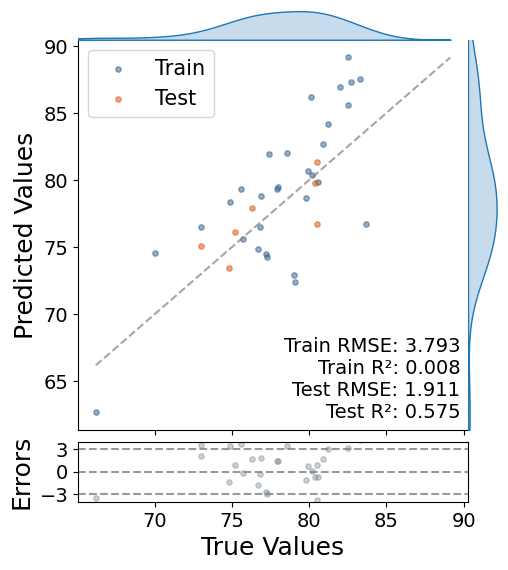

In [24]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - 分别绘制训练集和测试集数据点
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# 训练集数据点(蓝色)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# 测试集数据点(红色) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# 显示RMSE和R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - 使用统一的颜色
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(3, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-3, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-3.0, 0, 3.0])
ax_residual.set_ylim(-4, 4)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/uDSR_Hardness.png", dpi=600)